In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(100)
import random
random.seed(100)
import math

# Random Number Generation

## 1. From a Discrete Distribution

Let $X$ be a discrete random variable with a probability mass function (PMF) $P_X(x)$. We will learn and apply, under the scope of this tutorial, the following two approaches to draw samples from $P_X(x)$:

* Inverse Transform Method
* Acceptance-Rejection Method

### 1.1. Inverse Transform Method

For now, all methods are based on the assumption that we know how to draw a sample from UNIF(0,1). We will also talk about how we can deal with the distribution UNIF(0,1) later. Assuming this, we have the following two steps:

1) $Y \sim \text{UNIF}(0,1)$ 

2) $X \leftarrow X_i$ where $\sum\limits_{j=1}^{i-1}P_X(x_j) \leq Y \leq \sum\limits_{j=1}^{i}P_X(x_j)$

It is worth mentioning that the second step is nothing but just a linear search algorithm.

#### An illustrative Example
------------------------
Consider a loaded dice whose possible outcomes follow the probability distribution given below.

$P_X(1)=\frac{1}{3}, P_X(2)=\frac{1}{3}, P_X(3)=\frac{1}{6}, P_X(4)=\frac{1}{18},P_X(5)=\frac{1}{18},P_X(6)=\frac{1}{18}$

Let's say we want to have 2 draws from this distributions. Suppose that our two draws from UNIF(0,1) are 0.23 and 0.73. Now, the inverse-transform methods draws the sample as follows:

* First Draw: $0.23 \leq P_X(1)=\frac{1}{3}$, so $X^{(1)} \leftarrow 1$ where $X^{(i)}$ denotes the i$^{\text{th}}$ draw in the sample

* Second Draw: $P_X(1)+P_X(2)=\frac{2}{3} \leq 0.73 \leq P_X(1)+P_X(2)+P_X(3)=\frac{5}{6}$, so $X^{(2)} \leftarrow 3$

#### Python Implementation
------------

In [2]:
def discrete_inverse_transform(P, n):
    
    """
    It applies inverse transform method 
    to draw a sample of size n from the 
    given distribution P.
    
    Inputs
    ------
    P: array, the ordered probability values
              for example, P[0]=P_X(1) etc.
    n: integer, sample size
    
    Output
    ------
    the sample in the form of a list
    """
    
    y = np.random.uniform(low=0.0, high=1.0, size=n)  
    
    sample = []
    for i in range(n):
        if y[i] <= P[0]:
            sample.append(1)  
        else:
            k=1
            while True:
                if P[:k].sum() < y[i] <= P[:k+1].sum():
                    sample.append(k+1)  # 'k+1' since python starts counting from zero.
                    break
                else:
                    k += 1
    
    return sample

In [3]:
def sample_hist(sample, P):
    
    """
    Plots the histogram of the given sample
    
    Inputs
    ------
    sample, list
    P, list, true distribution
    """
    
    pd.Series(sample).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', label='Drawing Sample')
    title = 'Sample distribution after ' + str(len(sample)) + ' draws'
    plt.title(title)
    plt.xlabel('Domain of X')
    plt.ylabel('Frequency in the sample')
    plt.grid(axis='y', alpha=0.75)
    expectations = [i * len(sample) for i in P]
    plt.plot(list(range(1,7)),expectations, color='orange', label='True Distribution')
    plt.legend()

In [4]:
dist = np.array([1.0/3.0,1.0/3.0,1.0/6.0,1.0/18.0,1.0/18.0,1.0/18.0])  # PMF for our loaded dice
sample = discrete_inverse_transform(dist,10000)

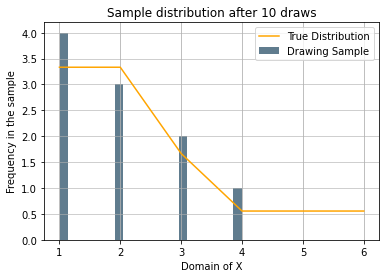

In [5]:
sample_hist(sample[:10], dist)

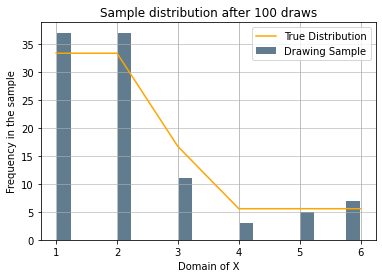

In [6]:
sample_hist(sample[:100], dist)

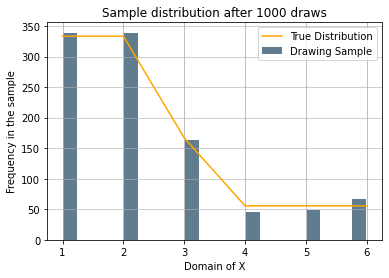

In [7]:
sample_hist(sample[:1000], dist)

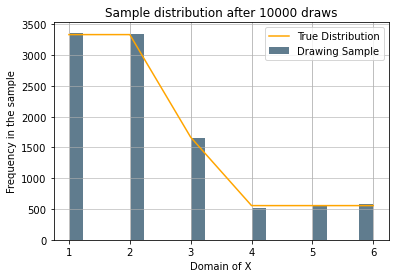

In [8]:
sample_hist(sample, dist)

##### <font color='purple'>Here, it is important to realize that the sample converges to the true underlying distribution, as the number of draws in the sample increases.</font>

### 1.2. Acceptance-Rejection Method

It is based on the idea that we want to have a sample from $P_X(x)$ where we only know how to draw from $P_Y(y)$.

We first define a constant $\epsilon \geq 1$ such that
$$ \frac{P_X(i)}{P_Y(i)} \leq \epsilon, \quad \forall i$$

It is important that $X$ and $Y$ has the same support.

#### Algorithm
------------------

1) Draw $i$ from $P_Y(y)$

2) Draw $u$ from UNIF(0,1)

3) If $u<\frac{P_X(i)}{\epsilon P_Y(i)}$, return $X=i$ and STOP. Otherwise, start again.

#### Analysis
---------

* Probability of acceptance at an iteration

$$\mathbb{P}\{\text{accepted}\} = \sum_{i}\mathbb{P}\{\text{accepted}, Y=i\}$$

$$\mathbb{P}\{\text{accepted}\} = \sum_{i}\mathbb{P}\{\text{accepted} |Y=i\}\mathbb{P}\{Y=i\}$$

$$\mathbb{P}\{\text{accepted}\} = \sum_{i}\frac{P_X(i)}{\epsilon P_Y(i)}P_Y(i)$$
$$\mathbb{P}\{\text{accepted}\} = \frac{1}{\epsilon}\sum_{i}P_X(i) = \frac{1}{\epsilon}$$

It follows that the number of iterations required to have an accepted draw is geometrially distributed with success probability $\frac{1}{\epsilon}$. Consequently, the average number of iterations becomes $\epsilon$.

* Probability of accepting $i$ at iteration $n$: It includes the following three components:
    
    * Probability of rejection for the first $n-1$ iterations
    * Probability of drawing $i$ at iteration n
    * Probability of acceptance at iteration n
 

$$\mathbb{P}\{X=i|n\}=(1-\frac{1}{\epsilon})^{n-1}\frac{1}{\epsilon}P_X(i) $$

* We can eventually compute the probability of accepting (drawing) $i$, denoted by $\mathbb{P}\{X=i\}$.

$$\mathbb{P}\{X=i\} = \sum\limits_{n=1}^\infty \mathbb{P}\{X=i|n\}$$

$$\mathbb{P}\{X=i\} = \sum\limits_{n=1}^\infty (1-\frac{1}{\epsilon})^{n-1}\frac{1}{\epsilon}P_X(i)$$

$$\mathbb{P}\{X=i\} = \frac{1}{\epsilon}P_X(i)\sum\limits_{n=0}^\infty (1-\frac{1}{\epsilon})^{n}$$

$$\mathbb{P}\{X=i\} = P_X(i) \quad (\text{that is exaclty we seek to have!})$$

##### <font color='purple'> This method will be more meaningful when we have a continuous distribution for which computing the CDF is not tractable. Thus, the illustration and implementation will be presented later when we talk about sampling for continuous distributions or stochastic processes. </font>

## 2. From a Continuous Distribution

Let $X$ be a discrete random variable with a cumulative distribution function (CDF) $F_X(x)$. We will learn and apply, under the scope of this tutorial, the following two approaches to draw samples:

* Inverse Transform Method
* Acceptance-Rejection Method

### 2.1. Inverse Transform Method

Generate $F_X^{-1}(\text{UNIF}(0,1))$

#### Implementation for Exponential Distribution
---------------

$F_X(x)=1-e^{\lambda x}$ for $X \sim \text{EXPO}(\lambda) \rightarrow F_X^{-1}(x)=-\frac{ln(1-x)}{\lambda}$

Instead of $F_X^{-1}(x)=-\frac{ln(1-x)}{\lambda}$, we can use $F_X^{-1}(x)=-\frac{ln(x)}{\lambda}$ since $X \sim \text{UNIF}(0,1)$ implies that $(1-X) \sim \text{UNIF}(0,1)$

In [9]:
def expo_inverse_transform(rate, n):
    
    """
    It applies inverse transform method 
    to an exponential distribution with
    the given rate to sample of size n. 
    
    Inputs
    ------
    rate, integer, lambda
    n: integer, sample size
    
    Output
    ------
    Plots the sample directly
    """
    
    r = np.random.uniform(low=0.0, high=1.0, size=n)
    y = (-1.0/rate) * np.log(r)
    
    fig = plt.figure(figsize = (18,5))
    ax = fig.gca()
    pd.Series(y).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', label='Sample', ax=ax)
    
    title = str(n) + ' draws from exponential distribution(' + str(rate) + ')'
    plt.axvline(y.mean(),color='red', label='sample mean')
    plt.axvline(y[:10].mean(),color='orange', label='mean after 10 draws')
    plt.title(title)
    plt.legend()

Illustration with $\lambda=4$

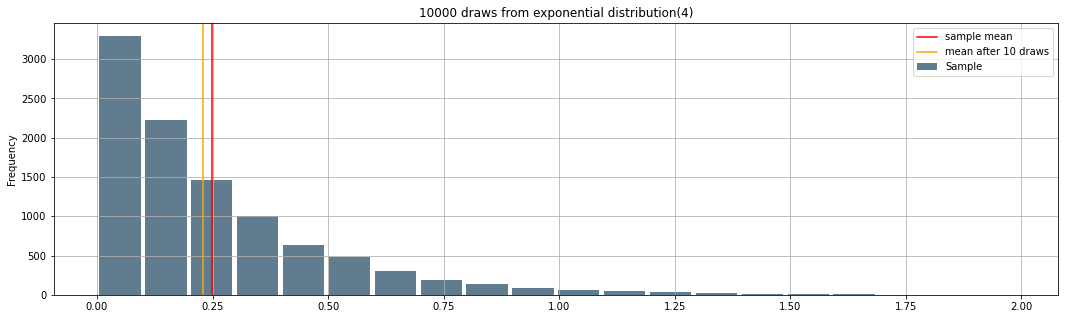

In [10]:
expo_inverse_transform(4,10000)

##### <font color='purple'> You see above that how sample mean converges to the theoretical mean (0.25 in our example), as the number of draws increases. </font>

##### <font color='blue'> Having closed-form expressions is not always the case for continuous distributions. Normal distribution is the best-known of this type of distributions. For them, we employ $\textit{acceptance-rejection}$ method </font>

### 2.2. Acceptance-Rejection Method

We have already introduced the logic behind the method. Thus, in this section, we show how we can generate a sample from $\mathcal{N}(0,1)$ using $\text{EXPO}(1)$.

Let $\bar{X}\sim \mathcal{N}(0,1)$ and $X=|\bar{X}| \rightarrow f_X(i)=\frac{2}{\sqrt{2\pi}}e^{-\frac{i^2}{2}}, 0<i<\infty$ 

Let $Y \sim EXPO(1) \rightarrow f_Y(i) = e^{-i}, 0<y<\infty$

$\frac{f_X(i)}{f_Y(i)}=\frac{2}{\sqrt{2\pi}}e^{i-\frac{i^2}{2}}$ which takes its maximum at $i=1$

$\frac{f_X(i)}{f_Y(i)} = \frac{f_X(1)}{f_Y(1)} = \sqrt{\frac{2e}{\pi}} \approx 1.315$

Let $c=\sqrt{\frac{2e}{\pi}} \rightarrow \frac{f_X(i)}{c f_Y(i)} = e^{- \frac{(i-1)^2}{2}}$

#### Algorithm
--------

1) Draw $Y \sim - ln[UNIF(0,1)]$ 

2) Draw $u_1 \sim UNIF(0,1)$

3) If $u_1 < e^{- \frac{(y-1)^2}{2}}$ return $X=y$ and go to step 4. Otherwise, go to step 1

4) Draw $u_2 \sim UNIF(0,1)$. If $u_2 <= 0.5$, return $X$; otherwise return $-X$

#### Implementation
-----------

In [6]:
def acceptance_rejection_standard_normal(n):
    
    """
    It applies acceptance-rejection method 
    to draw a sample of size n from N(0,1)
    
    Inputs
    ------
    n: integer, sample size
    
    Output
    ------
    the sample in the form of a list
    """
    
    sample = []
    while len(sample) < n:
        accepted = False
        while True:
            y, u_1 = -math.log(random.uniform(0,1)), random.uniform(0,1)
            
            if u_1 < math.exp(-0.5 * (y-1) * (y-1)):
                accepted = True
                if random.uniform(0,1) <= 0.5:
                    sample.append(y)
                else:
                    sample.append(-y)

            if accepted:
                break
    return sample

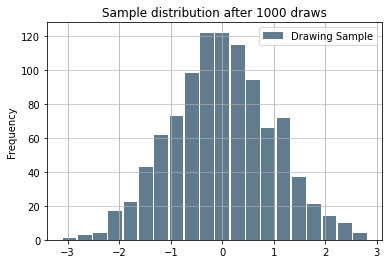

In [8]:
sample_ = acceptance_rejection_standard_normal(1000)
pd.Series(sample_).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', label='Drawing Sample')
title = 'Sample distribution after ' + str(len(sample_)) + ' draws'
plt.title(title)
plt.grid(axis='y', alpha=0.75)
plt.legend()

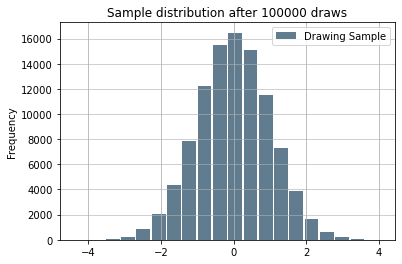

In [9]:
sample_ = acceptance_rejection_standard_normal(100000)
pd.Series(sample_).plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e', label='Drawing Sample')
title = 'Sample distribution after ' + str(len(sample_)) + ' draws'
plt.title(title)
plt.grid(axis='y', alpha=0.75)
plt.legend()

Note that if $X \sim \mathcal{N}(0,1)$, then $Y=\mu + X \sigma^2$ follows $\mathcal{N}(\mu,\sigma^2)$